# Introduction to Data Science - Assignment 2: Model deployment & MLFlow

### 1. Load Dataset

In [3]:
import pandas as pd
data = pd.read_csv('forestfires.csv')

In [4]:
data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

### 2. Exploratory Data Analysis

In [6]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


There are two features that are categorical values and need to be encoded.
* X - x-axis spatial coordinate within the Montesinho Park
* Y - x-axis spatial coordinate within the Montesinho Park
* temp - temperature
* RH - relative humidity

#### 2.1 Remove duplicated rows

In [9]:
duplicated_rows = data[data.duplicated(keep=False)]
print(duplicated_rows)
print(f'Number of duplicated rows: {len(duplicated_rows)}')

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
52   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
99   3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
214  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
302  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00
Number of duplicated rows: 8


In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.reset_index()

index  X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  \
0        0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   
1        1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   
2        2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   
3        3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   
4        4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   
..     ... .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...   
508    512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   
509    513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0   
510    514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0   
511    515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   
512    516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   

      area  
0     0.00  
1     0.00  
2     0.00  
3     0.00  
4     0.00  
..     ...  
508   6.44  
509  54.29  
510  11.16  
511   0.00  
512   0.00  

[513 rows x 14 columns]

The duplicated rows were removed so we can continue with the visualization of the most important features.

#### 2.2 Visualization of the most important features

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

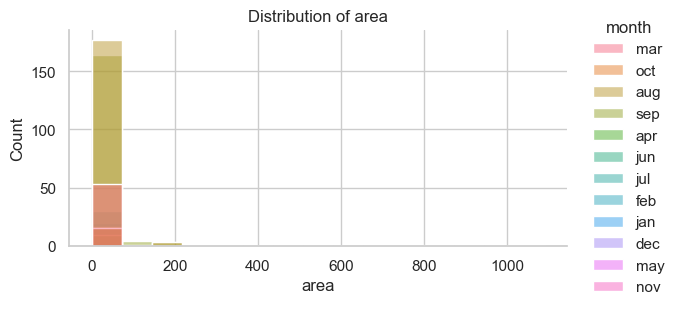

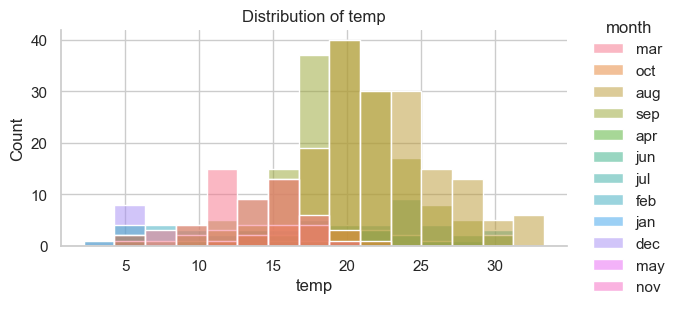

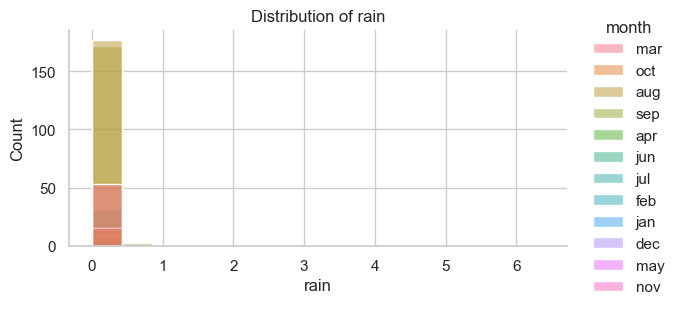

In [15]:
sns.set(style = 'whitegrid')
columns = ['area', 'temp', 'rain', 'wind']
for c in columns:
    sns.displot(data = data, x = c, hue = 'month', discrete = False, bins = 15, height = 3, aspect = 2)
    plt.title(f'Distribution of {c}')

* Area:
  * A few extreme outliers exist with very high burned area values (e.g., above 600), but these are rare majority of the values are around 0.
  * The month with the most ourliers is August.
* Temperature:
  * Temperatures are mainly between 15°C and 25°C, with a peak near 20°C.
* Rain:
  * Most values are concentrated around 0, implying very little rainfall during these events.
* Wind:
  * Wind speeds mostly fall between 2 to 4 km/h, with a clear peak around 4 km/h.

 
* August and September appear dominant in the data.
* Winter months show lower temperatures and limited area burned.

### 3. Data Preprocessing

#### 3.1 Remove missing values

In [19]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

#### 3.2 Encode the categorical values

Since there are no missing values in the dataset we do not need to remove rows and we can encode the month and days.

In [22]:
data['month'].value_counts()

month
aug    182
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [23]:
data['month_encoded'] = data['month'].apply(lambda x: 1 if x == 'jan' else 2 if x == 'feb' else 3 if x == 'mar' else 4 if x == 'apr' 
                                            else 5 if x == 'may' else 6 if x == 'jun' else 7 if x == 'jul' else 8 if x == 'aug' 
                                            else 9 if x == 'sep' else 10 if x == 'oct' else 11 if x == 'nov' else 12)

In [24]:
data['day'].value_counts()

day
sun    94
fri    84
sat    83
mon    74
tue    64
thu    61
wed    53
Name: count, dtype: int64

In [25]:
data['day_encoded'] = data['day'].apply(lambda x: 1 if x == 'mon' else 2 if x == 'tue' else 3 if x == 'wed' else 4 if x == 'thu' 
                                            else 5 if x == 'fri' else 6 if x == 'sat' else 7)

In [26]:
data = data.drop(columns = ['month', 'day'])

#### 3.3 Take a closer look at the target variable

In [28]:
data['area'].value_counts()

area
0.00     244
1.94       3
0.43       2
1.46       2
1.95       2
        ... 
5.80       1
2.17       1
6.44       1
54.29      1
11.16      1
Name: count, Length: 251, dtype: int64

There are a lot of entries with a forest fire area of 0 these can be removed since there has not been a forest fire. So no need to take a colser look at it. We want to predict how much area is burned based on the features in the dataset.

In [30]:
import numpy as np

In [31]:
final_data = data[data.area != 0]
final_data = final_data.reset_index()

In [32]:
final_data

index  X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0      138  9  9  85.8   48.3  313.4   3.9  18.0  42   2.7   0.0   0.36   
1      139  1  4  91.0  129.5  692.6   7.0  21.7  38   2.2   0.0   0.43   
2      140  2  5  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0   0.47   
3      141  1  2  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0   0.55   
4      142  8  6  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0   0.61   
..     ... .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...   
264    509  5  4  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17   
265    510  6  5  91.0  166.9  752.6   7.1  18.2  62   5.4   0.0   0.43   
266    512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
267    513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
268    514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   

     month_encoded  day_encoded  
0                7            2  
1                9            2  
2                9            1  
3                8            3  
4                8            5  
..             ...          ...  
264              8            5  
265              8            5  
266              8            7  
267              8            7  
268              8            7  

[269 rows x 14 columns]

#### 3.3 Identify and handle outliers

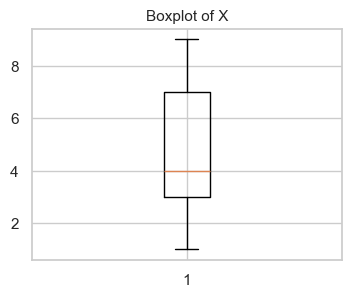

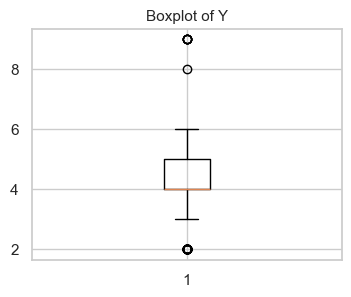

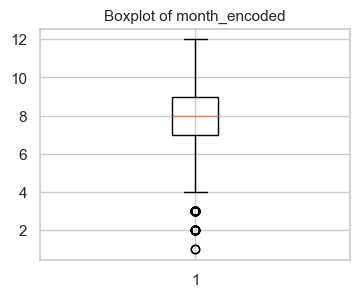

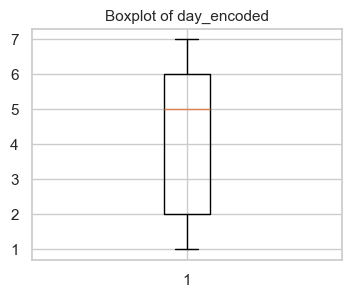

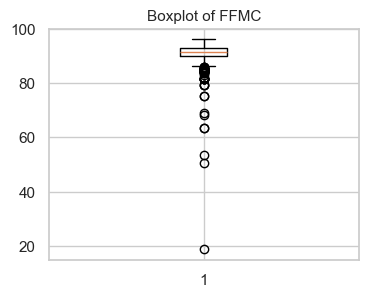

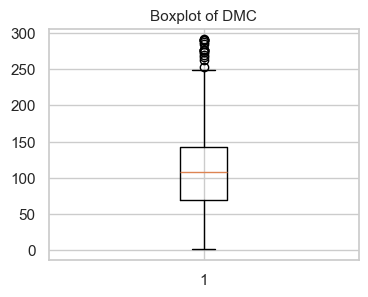

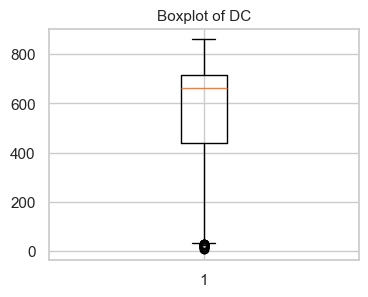

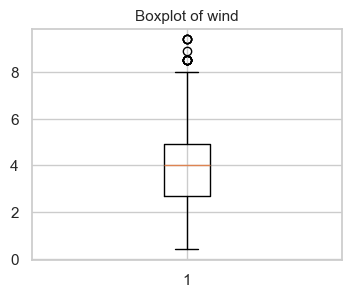

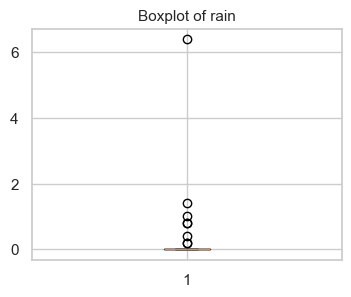

In [34]:
columns = ['X', 'Y', 'month_encoded', 'day_encoded', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
for c in columns:
  plt.figure(figsize=(4, 3))
  plt.boxplot(data[c])
  plt.title(f'Boxplot of {c}', fontsize=11)
  plt.show()

In [35]:
metrics = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
outliers_index = set()
for v in metrics:
    Q1 = final_data[v].quantile(0.25)
    Q3 = final_data[v].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = final_data[(final_data[v] < lower_bound) | (final_data[v] > upper_bound)]
    outliers_index.update(outliers.index)

In [36]:
len(outliers_index)

106

These are too many outliers to remove they most definetely contain important data.

In [38]:
final_data

index  X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0      138  9  9  85.8   48.3  313.4   3.9  18.0  42   2.7   0.0   0.36   
1      139  1  4  91.0  129.5  692.6   7.0  21.7  38   2.2   0.0   0.43   
2      140  2  5  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0   0.47   
3      141  1  2  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0   0.55   
4      142  8  6  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0   0.61   
..     ... .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...   
264    509  5  4  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17   
265    510  6  5  91.0  166.9  752.6   7.1  18.2  62   5.4   0.0   0.43   
266    512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
267    513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
268    514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   

     month_encoded  day_encoded  
0                7            2  
1                9            2  
2                9            1  
3                8            3  
4                8            5  
..             ...          ...  
264              8            5  
265              8            5  
266              8            7  
267              8            7  
268              8            7  

[269 rows x 14 columns]

#### 3.4 Normalize the data

In [40]:
from sklearn.preprocessing import MinMaxScaler
final_data = pd.DataFrame(MinMaxScaler().fit_transform(final_data), columns=final_data.columns)

In [41]:
final_data

index      X         Y      FFMC       DMC        DC       ISI  \
0    0.000000  1.000  1.000000  0.681957  0.156543  0.352656  0.141553   
1    0.002660  0.000  0.285714  0.840979  0.438389  0.801254  0.283105   
2    0.005319  0.125  0.428571  0.837920  0.427976  0.794038  0.283105   
3    0.007979  0.000  0.000000  0.978593  0.335647  0.589140  0.566210   
4    0.010638  0.875  0.571429  0.813456  0.363763  0.608660  0.534247   
..        ...    ...       ...       ...       ...       ...       ...   
264  0.986702  0.500  0.285714  0.840979  0.568205  0.872235  0.287671   
265  0.989362  0.625  0.428571  0.840979  0.568205  0.872235  0.287671   
266  0.994681  0.375  0.142857  0.553517  0.185699  0.769313  0.050228   
267  0.997340  0.125  0.285714  0.553517  0.185699  0.769313  0.050228   
268  1.000000  0.750  0.285714  0.553517  0.185699  0.769313  0.050228   

         temp        RH      wind     rain      area  month_encoded  \
0    0.508039  0.333333  0.255556  0.00000  0.000248            0.5   
1    0.627010  0.283951  0.200000  0.00000  0.000312            0.7   
2    0.633441  0.296296  0.155556  0.00000  0.000348            0.7   
3    0.678457  0.197531  0.455556  0.00000  0.000422            0.6   
4    0.610932  0.444444  0.944444  0.00000  0.000477            0.6   
..        ...       ...       ...      ...       ...            ...   
264  0.607717  0.691358  0.800000  0.21875  0.001907            0.6   
265  0.514469  0.580247  0.555556  0.00000  0.000312            0.6   
266  0.823151  0.209877  0.255556  0.00000  0.005822            0.6   
267  0.633441  0.691358  0.600000  0.00000  0.049691            0.6   
268  0.610932  0.679012  0.700000  0.00000  0.010149            0.6   

     day_encoded  
0       0.166667  
1       0.166667  
2       0.000000  
3       0.333333  
4       0.666667  
..           ...  
264     0.666667  
265     0.666667  
266     1.000000  
267     1.000000  
268     1.000000  

[269 rows x 14 columns]

We have to create a dataset that can be used for the prediction with unseen data.

In [43]:
prediction_data = final_data.sample(n = 9, random_state = 42)
final_data = final_data.drop(list(prediction_data.index))

In [44]:
prediction_data = prediction_data.reset_index()
prediction_data

level_0     index      X         Y      FFMC       DMC        DC       ISI  \
0       30  0.079787  0.625  0.428571  0.847095  0.156543  0.097598  0.534247   
1      116  0.329787  0.125  0.285714  0.859327  0.379035  0.659766  0.369863   
2       79  0.212766  0.375  0.428571  0.899083  0.451579  0.809535  0.383562   
3      127  0.364362  0.375  0.571429  0.645260  0.080528  0.398320  0.054795   
4      190  0.651596  1.000  0.571429  0.859327  0.851093  0.873654  0.251142   
5      137  0.409574  0.375  0.428571  0.859327  0.336689  0.533538  0.251142   
6      202  0.699468  0.250  0.285714  0.844037  0.295036  0.847510  0.342466   
7       45  0.119681  0.750  0.285714  0.862385  0.157237  0.805395  0.470320   
8      173  0.579787  0.375  0.285714  0.874618  0.332523  0.863599  0.401826   

       temp        RH      wind  rain      area  month_encoded  day_encoded  
0  0.398714  0.135802  1.000000   0.0  0.002237            0.1     0.666667  
1  0.617363  0.333333  0.300000   0.0  0.003814            0.6     0.666667  
2  0.553055  0.049383  0.100000   0.0  0.028998            0.7     0.333333  
3  0.093248  0.567901  0.500000   0.0  0.004850            1.0     0.500000  
4  0.588424  0.530864  0.255556   0.0  0.039221            0.6     0.500000  
5  0.665595  0.308642  0.100000   0.0  0.002338            0.5     0.666667  
6  0.662379  0.382716  0.400000   0.0  0.004456            0.7     0.500000  
7  0.469453  0.370370  0.455556   0.0  0.006179            0.8     0.000000  
8  0.598071  0.246914  0.500000   0.0  0.001073            0.7     0.666667

In [45]:
final_data = final_data.reset_index()
final_data

level_0     index      X         Y      FFMC       DMC        DC  \
0          0  0.000000  1.000  1.000000  0.681957  0.156543  0.352656   
1          1  0.002660  0.000  0.285714  0.840979  0.438389  0.801254   
2          2  0.005319  0.125  0.428571  0.837920  0.427976  0.794038   
3          3  0.007979  0.000  0.000000  0.978593  0.335647  0.589140   
4          4  0.010638  0.875  0.571429  0.813456  0.363763  0.608660   
..       ...       ...    ...       ...       ...       ...       ...   
255      264  0.986702  0.500  0.285714  0.840979  0.568205  0.872235   
256      265  0.989362  0.625  0.428571  0.840979  0.568205  0.872235   
257      266  0.994681  0.375  0.142857  0.553517  0.185699  0.769313   
258      267  0.997340  0.125  0.285714  0.553517  0.185699  0.769313   
259      268  1.000000  0.750  0.285714  0.553517  0.185699  0.769313   

          ISI      temp        RH      wind     rain      area  month_encoded  \
0    0.141553  0.508039  0.333333  0.255556  0.00000  0.000248            0.5   
1    0.283105  0.627010  0.283951  0.200000  0.00000  0.000312            0.7   
2    0.283105  0.633441  0.296296  0.155556  0.00000  0.000348            0.7   
3    0.566210  0.678457  0.197531  0.455556  0.00000  0.000422            0.6   
4    0.534247  0.610932  0.444444  0.944444  0.00000  0.000477            0.6   
..        ...       ...       ...       ...      ...       ...            ...   
255  0.287671  0.607717  0.691358  0.800000  0.21875  0.001907            0.6   
256  0.287671  0.514469  0.580247  0.555556  0.00000  0.000312            0.6   
257  0.050228  0.823151  0.209877  0.255556  0.00000  0.005822            0.6   
258  0.050228  0.633441  0.691358  0.600000  0.00000  0.049691            0.6   
259  0.050228  0.610932  0.679012  0.700000  0.00000  0.010149            0.6   

     day_encoded  
0       0.166667  
1       0.166667  
2       0.000000  
3       0.333333  
4       0.666667  
..           ...  
255     0.666667  
256     0.666667  
257     1.000000  
258     1.000000  
259     1.000000  

[260 rows x 15 columns]

### 4. MLFlow

#### 4.1 What is MLflow?

* open-source platform
* streamlines the end-to-end data science lifecycle
* has tools for experiment tracking, model packaging, and deployment
* helps to manage and reproduce experiments by logging parameters, metrics, and artifacts
* every iteration of a project is traceable

#### 4.2 Import libraries

In [50]:
import mlflow
import mlflow.keras  
from mlflow.models import infer_signature

#### 4.3 Start MLFlow Tracking Server

Set an experiment to track logs and set the Tracking Server URI:

In [53]:
mlflow.set_experiment("Forest Fires")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

### 5. Neural Network for Regression

#### 5.1 Split Data into Train and Test Sets

In [56]:
from sklearn.model_selection import train_test_split

X = final_data.drop(columns=['area', 'index', 'level_0'])  
Y = final_data['area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [57]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

#### 5.2 Design the Neural Network

Use autolog to log all parameters and metrics of the model to MLflow.

In [60]:
import tensorflow as tf
mlflow.tensorflow.autolog()

batch_size = 32
epochs = 100
optimizer = 'adam'
loss_function = 'mse'

* Input layer matching the number of features.
* Hidden layers with suitable activation functions (e.g., ReLU).
* Output layer with one neuron (for regression) and no activation since it is the last layer.

* Dense(64, activation='relu'): A fully connected layer with 64 neurons and ReLU activation.
* Dense(1): A single neuron in the output layer for regression.
* optimizer='adam': Optimizes the weights using the Adam optimizer.
* loss='mse': Minimizes mean squared error.
* metrics=['mae']: Tracks mean absolute error during training.

In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])

model.summary()

C:\Users\Kim_W\DS_Assignment2\dsassignment2\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

#### 5.4 Train and Log the Model with MLFlow

In [64]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size = batch_size, validation_data=(X_test, Y_test))

val_loss = history.history['val_loss'][-1]
val_mae = history.history['val_mae'][-1]

mlflow.keras.log_model(model, "model")


2024/12/15 15:01:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b4720b38be0b47598025e576e36b88d7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0162 - mae: 0.0820

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 0.0155 - mae: 0.0806 - val_loss: 0.0230 - val_mae: 0.0805
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0069 - mae: 0.0598 - val_loss: 0.0244 - val_mae: 0.0629
Epoch 3/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - loss: 0.0023 - mae: 0.0341

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0052 - mae: 0.0410 - val_loss: 0.0215 - val_mae: 0.0547
Epoch 4/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0033 - mae: 0.0434

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0044 - mae: 0.0416 - val_loss: 0.0208 - val_mae: 0.0560
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024 - mae: 0.0319 - val_loss: 0.0219 - val_mae: 0.0494
Epoch 6/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0154 - mae: 0.0406

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0069 - mae: 0.0373 - val_loss: 0.0205 - val_mae: 0.0575
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0067 - mae: 0.0420 - val_loss: 0.0218 - val_mae: 0.0487
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0025 - mae: 0.0288 - val_loss: 0.0206 - val_mae: 0.0497
Epoch 9/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0016 - mae: 0.0290

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0047 - mae: 0.0369 - val_loss: 0.0205 - val_mae: 0.0527
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0037 - mae: 0.0300 - val_loss: 0.0212 - val_mae: 0.0474
Epoch 11/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step - loss: 0.0010 - mae: 0.0270

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0021 - mae: 0.0262 - val_loss: 0.0202 - val_mae: 0.0506
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0044 - mae: 0.0358 - val_loss: 0.0202 - val_mae: 0.0466
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0057 - mae: 0.0299 - val_loss: 0.0207 - val_mae: 0.0450
Epoch 14/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0021 - mae: 0.0279

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0034 - mae: 0.0265 - val_loss: 0.0199 - val_mae: 0.0498
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0044 - mae: 0.0329 - val_loss: 0.0205 - val_mae: 0.0439
Epoch 16/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0021 - mae: 0.0230 - val_loss: 0.0199 - val_mae: 0.0468
Epoch 17/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0033 - mae: 0.0329 - val_loss: 0.0199 - val_mae: 0.0439
Epoch 18/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0025 - mae: 0.0246 - val_loss: 0.0200 - val_mae: 0.0416
Epoch 19/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3.8503e-04 - mae: 0.0142

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0023 - mae: 0.0252 - val_loss: 0.0199 - val_mae: 0.0448
Epoch 20/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0043 - mae: 0.0293 - val_loss: 0.0203 - val_mae: 0.0419
Epoch 21/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0022 - mae: 0.0224 - val_loss: 0.0199 - val_mae: 0.0486
Epoch 22/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0016 - mae: 0.0235 - val_loss: 0.0199 - val_mae: 0.0436
Epoch 23/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0018 - mae: 0.0243 - val_loss: 0.0200 - val_mae: 0.0472
Epoch 24/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 4.0238e-04 - mae: 0.0154

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0027 - mae: 0.0245 - val_loss: 0.0198 - val_mae: 0.0453
Epoch 25/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035 - mae: 0.0257 - val_loss: 0.0201 - val_mae: 0.0431
Epoch 26/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0030 - mae: 0.0249 - val_loss: 0.0201 - val_mae: 0.0440
Epoch 27/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0023 - mae: 0.0211 - val_loss: 0.0199 - val_mae: 0.0495
Epoch 28/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0017 - mae: 0.0240 - val_loss: 0.0200 - val_mae: 0.0439
Epoch 29/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0015 - mae: 0.0250

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0028 - mae: 0.0246 - val_loss: 0.0198 - val_mae: 0.0471
Epoch 30/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0018 - mae: 0.0219 - val_loss: 0.0198 - val_mae: 0.0469
Epoch 31/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0048 - mae: 0.0328 - val_loss: 0.0204 - val_mae: 0.0431
Epoch 32/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0016 - mae: 0.0206

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0030 - mae: 0.0241 - val_loss: 0.0195 - val_mae: 0.0509
Epoch 33/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0045 - mae: 0.0320 - val_loss: 0.0204 - val_mae: 0.0428
Epoch 34/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0025 - mae: 0.0229 - val_loss: 0.0198 - val_mae: 0.0520
Epoch 35/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0018 - mae: 0.0233 - val_loss: 0.0198 - val_mae: 0.0463
Epoch 36/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0024 - mae: 0.0266 - val_loss: 0.0201 - val_mae: 0.0439
Epoch 37/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0031 - mae: 0.0228 - val_loss: 0.0199 - val_mae: 0.0487
Epoch 38/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0018 - mae: 0.0266 - val_loss: 0.0201 - val_mae: 0.0439
Epoch 39/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0013 - mae: 0.0204 - val_loss: 0.0196 - val_mae: 0.0502
Epoch 40/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0021 - mae: 0.02

2024/12/15 15:02:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


🏃 View run rogue-carp-743 at: http://127.0.0.1:5000/#/experiments/258067141072694385/runs/b4720b38be0b47598025e576e36b88d7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/258067141072694385


2024/12/15 15:02:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow cab track key aspects of machine learning experiments. It focuses on the following:

* Parameters:
    * These are the configuration values used to train the model.
    * By logging parameters, MLflow can track how a particular model was trained.
* Metrics:
    * Metrics are the performance measures of a model.
    * MLflow records these metrics so we can compare the performance of different models.


Train different models, switching up parameters or using different algorithms. Each run is automatically logged with the parameters, metrics, and artifacts. MLflow UI can be used to visualize and compare results from multiple runs.  Since MLflow tracks not just results but also the code version and environment, it can be easily reproduced or shared.

#### 5.5 Evaluate the model

In [67]:
test_loss, test_mae = model.evaluate(X_test, Y_test, batch_size=batch_size)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0145 - mae: 0.0508
Test Loss: 0.020329156890511513, Test MAE: 0.0554148405790329


The metrics indicate that the model performs well on the test data. 

#### 5.6 Save and Reload the Model

In [79]:
import pickle

In [81]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

#### 5.7 Visualize Training Progress

In [83]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### 6. Predictions

In [85]:
import pandas as pd
from tensorflow.keras.models import load_model

with open("model.pkl", "rb") as f:
    model = pickle.load(f)

pdata = prediction_data.drop(columns=['area', 'index', 'level_0'])

prediction_data['predicted_area'] = model.predict(pdata)
print(prediction_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


C:\Users\Kim_W\DS_Assignment2\dsassignment2\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


   level_0     index      X         Y      FFMC       DMC        DC       ISI  \
0       30  0.079787  0.625  0.428571  0.847095  0.156543  0.097598  0.534247   
1      116  0.329787  0.125  0.285714  0.859327  0.379035  0.659766  0.369863   
2       79  0.212766  0.375  0.428571  0.899083  0.451579  0.809535  0.383562   
3      127  0.364362  0.375  0.571429  0.645260  0.080528  0.398320  0.054795   
4      190  0.651596  1.000  0.571429  0.859327  0.851093  0.873654  0.251142   
5      137  0.409574  0.375  0.428571  0.859327  0.336689  0.533538  0.251142   
6      202  0.699468  0.250  0.285714  0.844037  0.295036  0.847510  0.342466   
7       45  0.119681  0.750  0.285714  0.862385  0.157237  0.805395  0.470320   
8      173  0.579787  0.375  0.285714  0.874618  0.332523  0.863599  0.401826   

       temp        RH      wind  rain      area  month_encoded  day_encoded  \
0  0.398714  0.135802  1.000000   0.0  0.002237            0.1     0.666667   
1  0.617363  0.333333  0.300000

As we can see the prediction is quite bad, this can be due to the small amount of training data.

### 7. Deployment Method

##### Deployment using Flask

1. Create a Flask App
    * Python file (Forestfireapp.py) loads the trained model and defines endpoints for prediction (see screenshot of Forestfireapp.py in the PDF file)
2. Run the Flask app in the terminal
    * Run the Flask app locally
    * Access the app in browser at http://127.0.0.1:5001
4. Test the API
    * Test the /predict endpoint

In [87]:
%run Forestfireapp.py

Flask script started!
Starting Flask app...


C:\Users\Kim_W\DS_Assignment2\dsassignment2\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


 * Serving Flask app 'Forestfireapp'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [15/Dec/2024 15:03:12] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


INFO:werkzeug:127.0.0.1 - - [15/Dec/2024 15:03:13] "POST /predict HTTP/1.1" 200 -


In [89]:
predictdata = pdata.sample(n = 1, random_state = 42)

In [91]:
list = predictdata.iloc[0].values.tolist()

print(list)

[0.75, 0.2857142857142857, 0.8623853211009174, 0.15723707046164523, 0.8053945344847981, 0.4703196347031964, 0.4694533762057879, 0.3703703703703704, 0.45555555555555555, 0.0, 0.8, 0.0]


In [93]:
import requests

# Test the home route
response = requests.get("http://127.0.0.1:5001/")
print(response.text)

# Test the /predict route (POST)
data ={"features": list}
response = requests.post("http://127.0.0.1:5001/predict", json=data)
print('Prediction:', response.json())

Model Deployment with Flask is up and running!
Prediction: {'prediction': 0.009762265719473362}
